In [5]:
import Ab as ab
import datetime as dt
import matplotlib.pyplot as plt

# Get data from yahoo finance
sd = dt.datetime(1998,12,4)
ed = dt.datetime(2023,2,23)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ', sd, ed)
#nasdaq stocks above 200 day moving average percentage
naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')


[*********************100%***********************]  1 of 1 completed


In [8]:
def sliding_test(ticker: ab.StockData, stg:ab.Strategy, window: int, sd: dt.datetime, ed: dt.datetime, run_strategy: bool = True):
    delta = ed - sd
    result = []
    for i in range(0, delta.days + 1, 30):
        sd_5y = sd + dt.timedelta(days=i)
        ed_5y = sd + dt.timedelta(days=i) + dt.timedelta(days=window)
        if run_strategy:
            stg.run_strategy(ticker, sd_5y, ed_5y)
        bt = None
        bt = ab.BackTest(sd_5y, ed_5y,1)
        bt.run_backtest(stg, ticker)
        result.append([sd_5y,bt.balance['Total'].iloc[-1]])
    return result



In [6]:
sd = dt.datetime(2000,1,1)
ed = dt.datetime(2017,1,1)
window = 365*5

In [4]:
buy_and_hold = ab.BuyAndHold()
bh_result = sliding_test(qqq,buy_and_hold,window, sd,ed， True)

In [9]:
threshold_strategy = ab.Threshold(signal_data = naa200r, indicator = 'SignalPrice', buy_threshold = 15, sell_threshold = 30)
naa200r_result = sliding_test(qqq,threshold_strategy,window, sd,ed，False)

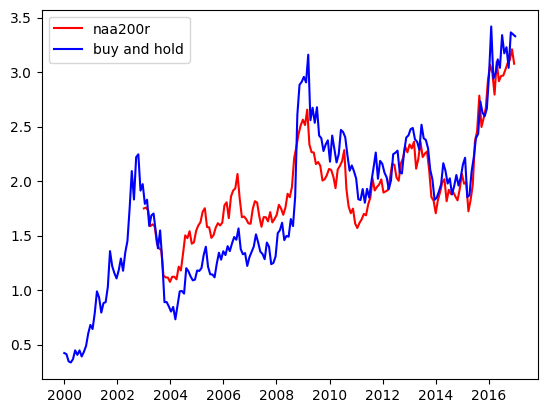

In [ ]:
plt.plot([x[0] for x in naa200r_result], [x[1] for x in naa200r_result], label='naa200r', color='red')
plt.plot([x[0] for x in bh_result], [x[1] for x in bh_result], label='buy and hold', color='blue')
plt.legend()